### Lending Club Loan - Exploratory Data Analysis
<hr>

##  Objectives
 To:

    - Data Cleaning
    -Feature Engineering & Transformation
    

**Datasets required:**

- `loan.csv` from [Kaggle/Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data)
- refer to data dicitonary to understand the column abbreviation `LCDataDictionary.xlsx` from [Kaggle/Lending Club Loan Data](https://www.kaggle.com/wendykan/lending-club-loan-data)


Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler,StandardScaler

import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
# import tensorflow.keras.utils as Utils

### EDA component: 

In [2]:
df = pd.read_csv('loan.csv')
df.describe().transpose()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,count,mean,std,min,25%,50%,75%,max
id,887379.0,3.246513e+07,2.282734e+07,54734.00,9.206643e+06,3.443327e+07,5.490814e+07,6.861706e+07
member_id,887379.0,3.500182e+07,2.411335e+07,70473.00,1.087713e+07,3.709528e+07,5.847135e+07,7.354484e+07
loan_amnt,887379.0,1.475526e+04,8.435456e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt,887379.0,1.474188e+04,8.429898e+03,500.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,887379.0,1.470246e+04,8.442107e+03,0.00,8.000000e+03,1.300000e+04,2.000000e+04,3.500000e+04
int_rate,887379.0,1.324674e+01,4.381867e+00,5.32,9.990000e+00,1.299000e+01,1.620000e+01,2.899000e+01
installment,887379.0,4.367171e+02,2.441866e+02,15.67,2.607050e+02,3.825500e+02,5.726000e+02,1.445460e+03
annual_inc,887375.0,7.502759e+04,6.469830e+04,0.00,4.500000e+04,6.500000e+04,9.000000e+04,9.500000e+06
dti,887379.0,1.815704e+01,1.719063e+01,0.00,1.191000e+01,1.765000e+01,2.395000e+01,9.999000e+03
delinq_2yrs,887350.0,3.144419e-01,8.622438e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01


In [3]:
df.shape

(887379, 74)

887379 rows & 74 columns!! Ain't that overwhelming!

We'll have to attempt to feature engineer ; cut down the amount of columns used in our analysis.
    - this will prevent any overfitting should we choose a regression based model

Let us first identify if there are any null values in the dataset that requires cleaning

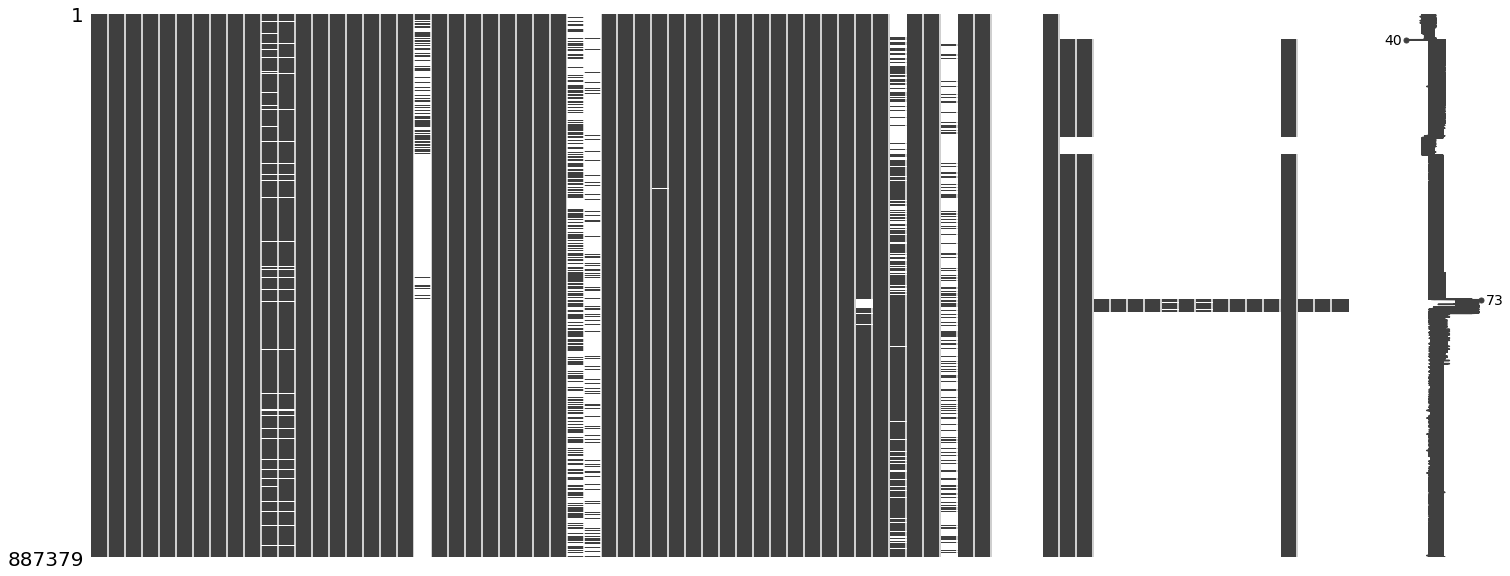

In [4]:
msno.matrix(df)

There are many null values in some columns; let us ignore that for now and further explore the data to see why

Let us first split our data into categortical & numerical data types.


In [5]:
numeric_features = df.select_dtypes(include=[np.number])

numeric_features.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [6]:
categorical_features = df.select_dtypes(include=[np.object])

categorical_features.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

For our numeric features, let us focus on removing redundant columns:
1. Columns with high correlation have to be observed - this will reduce multicollinearity 
2. Keeping our intended use case for our model in mind, we'll remove features that shares very similar/same meaning with each other

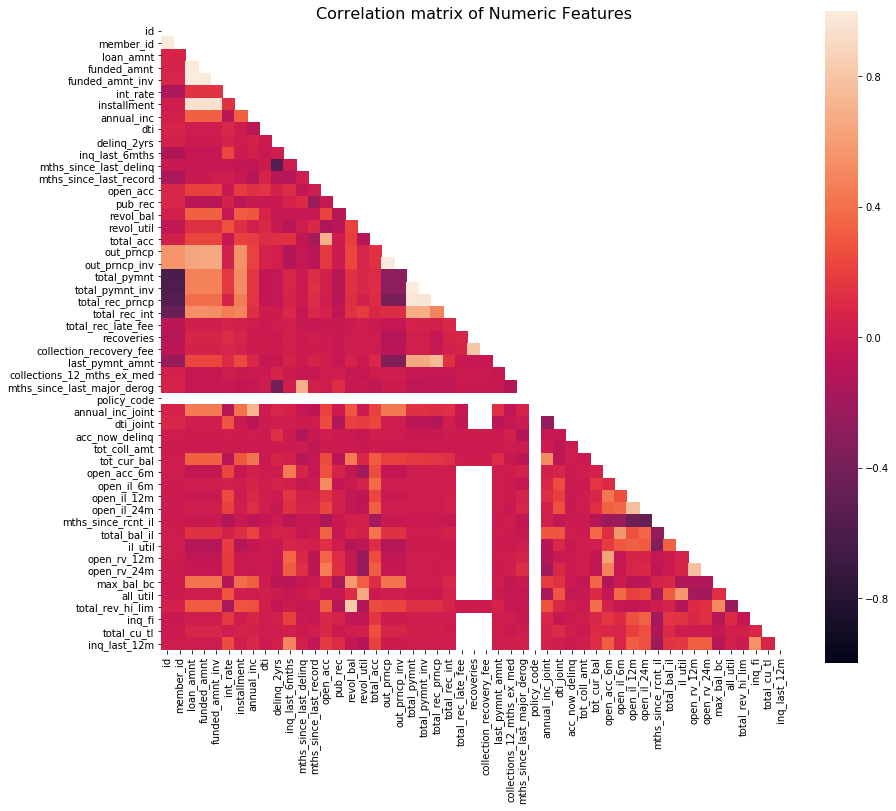

In [7]:
correlation = numeric_features.corr()
cols = correlation.index
f , ax = plt.subplots(figsize = (14,12))

plt.title('Correlation matrix of Numeric Features',y=1,size=16)
# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(correlation,square = True,annot=False,mask=mask ,
            linecolor="white", vmax=1,vmin = -1)

Observing heatmap, 

features with high correlation includes:
    
    -id vs total_pymnt
    -id vs total_pymnt_inv
    -id vs total_rec_prncp
    
    -member_id vs total_pymnt
    -member_id vs total_pymnt_inv
    -member_id vs total_rec_prncp
    
    -loan_amnt vs funded_amnt
    -loan_amnt vs funded_amnt_inv
    -loan_amnt vs installment
    
    -funded_amnt vs funded_amt_inv
    -funded_amnt vs installment
    
    -funded_amnt_inv vs installment
    
    -delinq_2yrs vs mths_since_last_delinq
    
    
    -total_pymnt vs total_pymnt_inv
    -total_pymnt vs total_rec_prncp
    -total_pymnt_inv vs total_rec_prncp
    
    -open_il_12m vs mths_since_rcnt_il
    
    -open_il_24m vs mths_since_rcnt_il
    
features with null includes:   
    -policy_code
    
    -total_rec_late_fee vs open_acc_6m
    -total_rec_late_fee vs open_il_6m
    -total_rec_late_fee vs open_il_12m
    -total_rec_late_fee vs open_il_24m
    -total_rec_late_fee vs mths_since_rcnt_il
    -total_rec_late_fee vs total_bal_il
    -total_rec_late_fee vs il_util
    -total_rec_late_fee vs open_rv_12m
    -total_rec_late_fee vs open_rv_24m
    -total_rec_late_fee vs max_bal_bc
    -total_rec_late_fee vs all_util
    -total_rec_late_fee vs inq_fi
    -total_rec_late_fee vs total_cu_tl
    -total_rec_late_fee vs inq_last_12m
    
    -recoveries_fee vs open_acc_6m
    -recoveries vs open_il_6m
    -recoveries vs open_il_12m
    -recoveries vs open_il_24m
    -recoveries vs mths_since_rcnt_il
    -recoveries vs total_bal_il
    -recoveries vs il_util
    -recoveries vs open_rv_12m
    -recoveries vs open_rv_24m
    -recoveries vs max_bal_bc
    -recoveries vs all_util
    -recoveries vs inq_fi
    -recoveries vs total_cu_tl
    -recoveries vs inq_last_12m
    
    -collection_recovery_fee vs open_acc_6m
    -collection_recovery_fee vs open_il_6m
    -collection_recovery_fee vs open_il_12m
    -collection_recovery_fee vs open_il_24m
    -collection_recovery_fee vs mths_since_rcnt_il
    -collection_recovery_fee vs total_bal_il
    -collection_recovery_fee vs il_util
    -collection_recovery_fee vs open_rv_12m
    -collection_recovery_fee vs open_rv_24m
    -collection_recovery_fee vs max_bal_bc
    -collection_recovery_fee vs all_util
    -collection_recovery_fee vs inq_fi
    -collection_recovery_fee vs total_cu_tl
    -collection_recovery_fee vs inq_last_12m

Now, let us look(visualize) at the categorical features that we'll definitely have to use in our model:

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


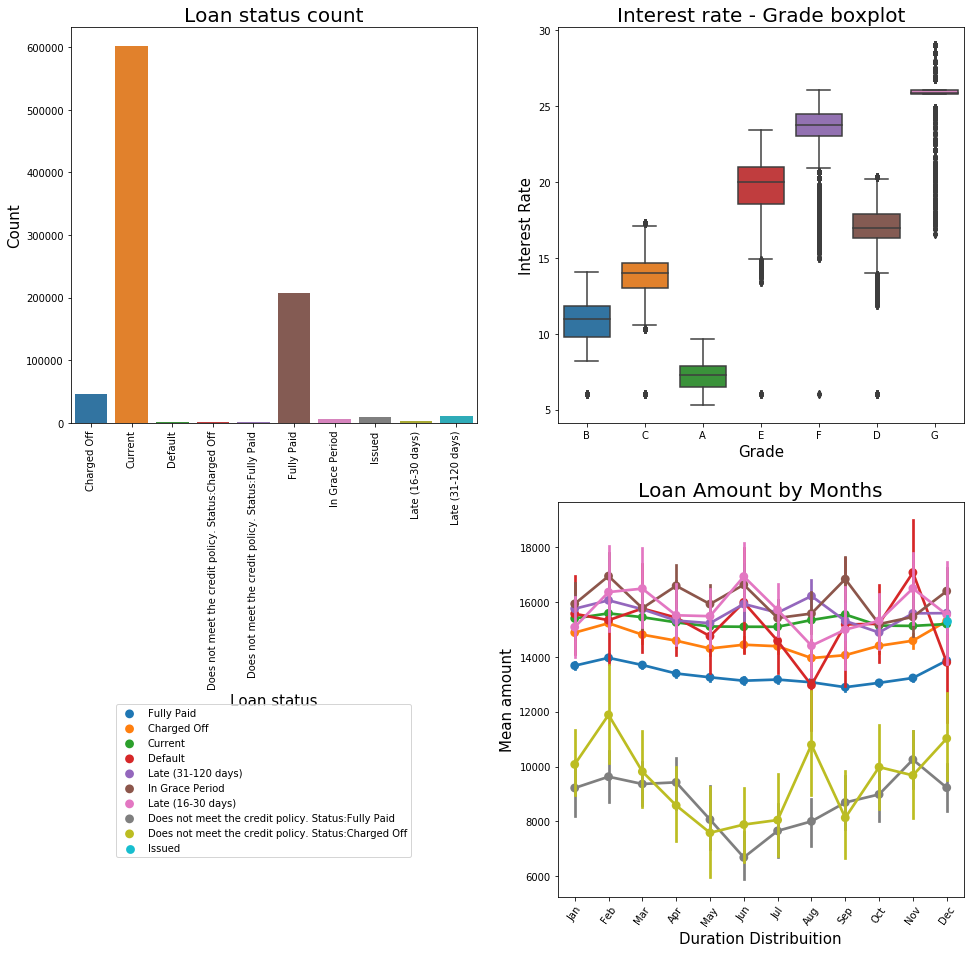

In [8]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str

fig = plt.figure(figsize=(16, 16))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,4)
ax3 = fig.add_subplot(2,2,2)

loan_status_df = df.groupby('loan_status').size().reset_index(name='Count')
g1=sns.barplot(x=loan_status_df['loan_status'],y=loan_status_df['Count'],ax=ax1)
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title('Loan status count',fontsize=20)
g1.set_xlabel("Loan status", fontsize=15)
g1.set_ylabel("Count", fontsize=15)

months_order = ["Jan", "Feb", "Mar", "Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
df['issue_month'] = pd.Categorical(df['issue_month'],categories=months_order, ordered=True)


g2 = sns.pointplot(x='issue_month', y='loan_amnt', data=df, ax=ax2, hue='loan_status') 
g2.set_xticklabels(g2.get_xticklabels(),rotation=55)
g2.set_xlabel("Duration Distribuition", fontsize=15)
g2.set_ylabel("Mean amount", fontsize=15)
g2.legend(loc='upper right',bbox_to_anchor=(-0.35, 0.5))
g2.set_title("Loan Amount by Months", fontsize=20)

g3 = sns.boxplot(x=df['grade'], y=df['int_rate'], ax=ax3)
g3.set_xlabel("Grade", fontsize=15)
g3.set_ylabel("Interest Rate", fontsize=15)
g3.set_title("Interest rate - Grade boxplot", fontsize=20)

plt.show()

What we can observe from the above:
1. higer grade loans has lower interest rate
2. Months with the highest charged off loans are in Feb & Aug. - Does this have anything to do with auditing cycles?
3. Month with highest defaults is Nov; could this be due to consumer's uncontrollable shopping behaviour in during xmas sales?

Looking closer at the dataset, columns with many null values are due to conditional events:
for e.g., late loans - last payment date

Intent for model:to predict the credit riskyness of future borrowers that approach the lending club

As such, certain historical features in the dataset will not be selected since those data are only collected once the borrowers are already on loan.

With that, we've narrowed down features to the following:

Numerical:
1. loan_amnt
2. int_rate
3. annual_inc
4. dti
5. open_acc
6. pub_rec
7. (loan_amnt - funded_amnt)

Catergorical:
8. term (2)
9. grade (7)
10. emp_length (11)
11. home_ownership (6)
12. verification_status (3)
13. purpose (14)
14. zip_code (935)
15. initial_list_status (2)
16. loan_status (10)

With that, let us clean the dataset!

In [9]:
df['zip_code']=df['zip_code'].apply(lambda x: x[:-2])
df['zip_code']=df['zip_code'].apply(lambda x: int(x))

In [10]:
def zipcode(x):
    if 5<x<10:
        return 'Puerto Rico'
    elif 9<x<28:
        return 'Massachusetts'
    elif 27<x<30:
        return 'Rhode Island'
    elif 29<x<39:
        return 'New Hampshire'
    elif 38<x<50:
        return 'Maine'
    elif 49<x<60:
        return 'Vermont'
    elif 59<x<70:
        return 'Connecticut'
    elif 69<x<90:
        return 'New Jersey'
    elif 89<x<100:
        return 'US Armed Forces'
    elif 99<x<150:
        return 'New York'
    elif 149<x<197:
        return 'Pennsylvania'
    elif 196<x<200:
        return 'Delaware'
    elif 199<x<206:
        return 'Washington, DC'
    elif 205<x<220:
        return 'Maryland'
    elif 219<x<247:
        return 'Virginia'
    elif 246<x<269:
        return 'West Virginia'
    elif 269<x<290:
        return 'North Carolina'
    elif 289<x<300:
        return 'South Carolina'
    elif 299<x<320:
        return 'Georgia'
    elif 319<x<350:
        return 'Florida'
    elif 349<x<370:
        return 'Alabama'
    elif 369<x<386:
        return 'Tennessee'
    elif 385<x<400:
        return 'Mississippi'
    elif 399<x<428:
        return 'Kentucky'
    elif 429<x<460:
        return 'Ohio'
    elif 459<x<480:
        return 'Indiana'
    elif 479<x<500:
        return 'Michigan'
    elif 499<x<529:
        return 'Iowa'
    elif 529<x<550:
        return 'Wisconsin'
    elif 549<x<568:
        return 'Minnesota'
    elif 569<x<589:
        return 'Dakota'
    elif 589<x<600:
        return 'Montanna'
    elif 599<x<630:
        return 'Illinois'
    elif 629<x<659:
        return 'Missouri'
    elif 658<x<680:
        return 'Kansas'
    elif 679<x<700:
        return 'Nebraska'
    elif 699<x<715:
        return 'Lousiana'
    elif 715<x<730:
        return 'Arkansas'
    elif 729<x<750:
        return 'Oklahoma'
    elif 749<x<800:
        return 'Texas'
    elif 799<x<817:
        return 'Colorado'
    elif 816<x<832:
        return 'Wyoming'
    elif 831<x<838:
        return 'Idaho'
    elif 839<x<849:
        return 'Utah'
    elif 849<x<866:
        return 'Arizonna'
    elif 869<x<885:
        return 'New Mexico'
    elif 888<x<899:
        return 'Nevada'
    elif 899<x<962:
        return 'California'
    elif 966<x<969:
        return 'Hawaii'
    elif 969<x<980:
        return 'Oregon'
    elif 979<x<995:
        return 'Washington'
    else:
        return 'Alaska'
        

In [11]:
df['zip_code'] = df['zip_code'].apply(zipcode)

In [12]:
df1 = df[['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec','term','grade','emp_length',
          'home_ownership','verification_status','purpose','zip_code','initial_list_status','loan_status']]
df1['loan-fund amnt diff'] = df['loan_amnt']-df['funded_amnt']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


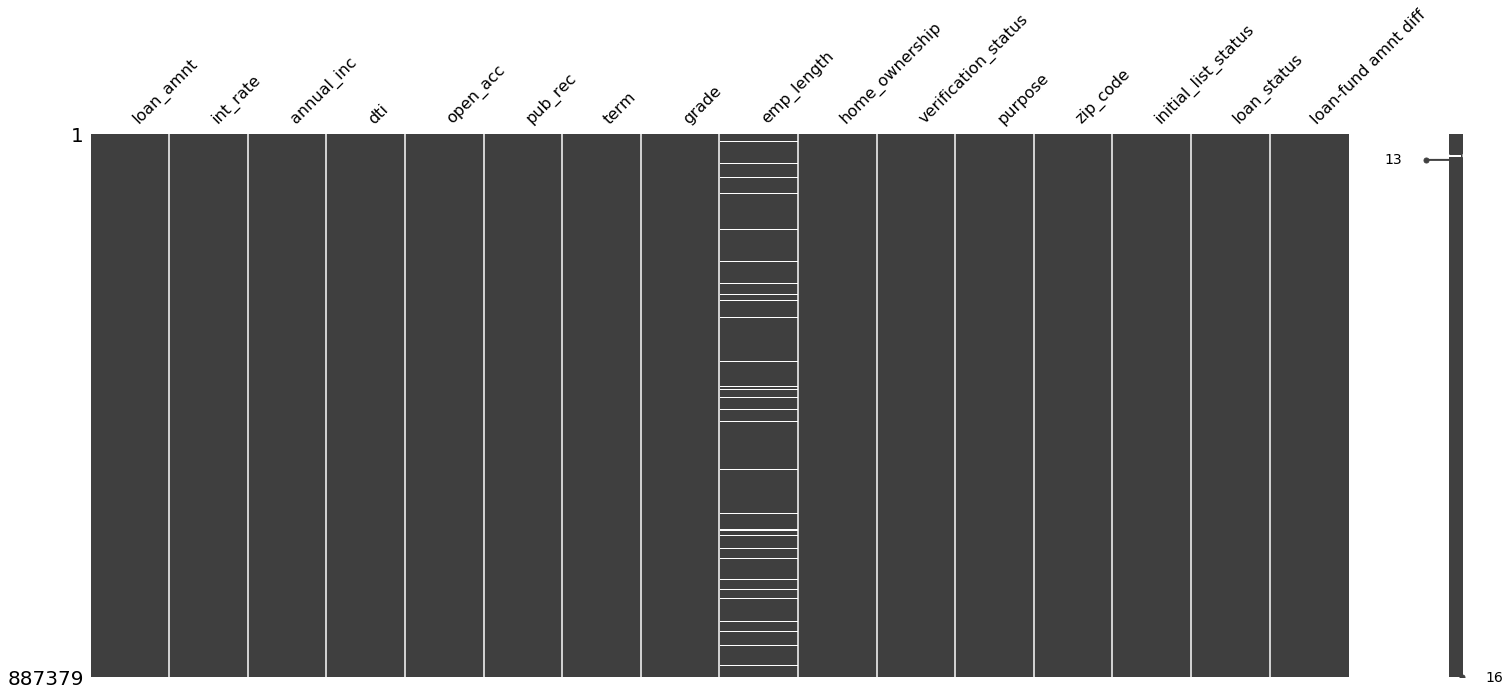

In [13]:
msno.matrix(df1)

Dataset is alot cleaner, but still have some null values. Lets remove them.

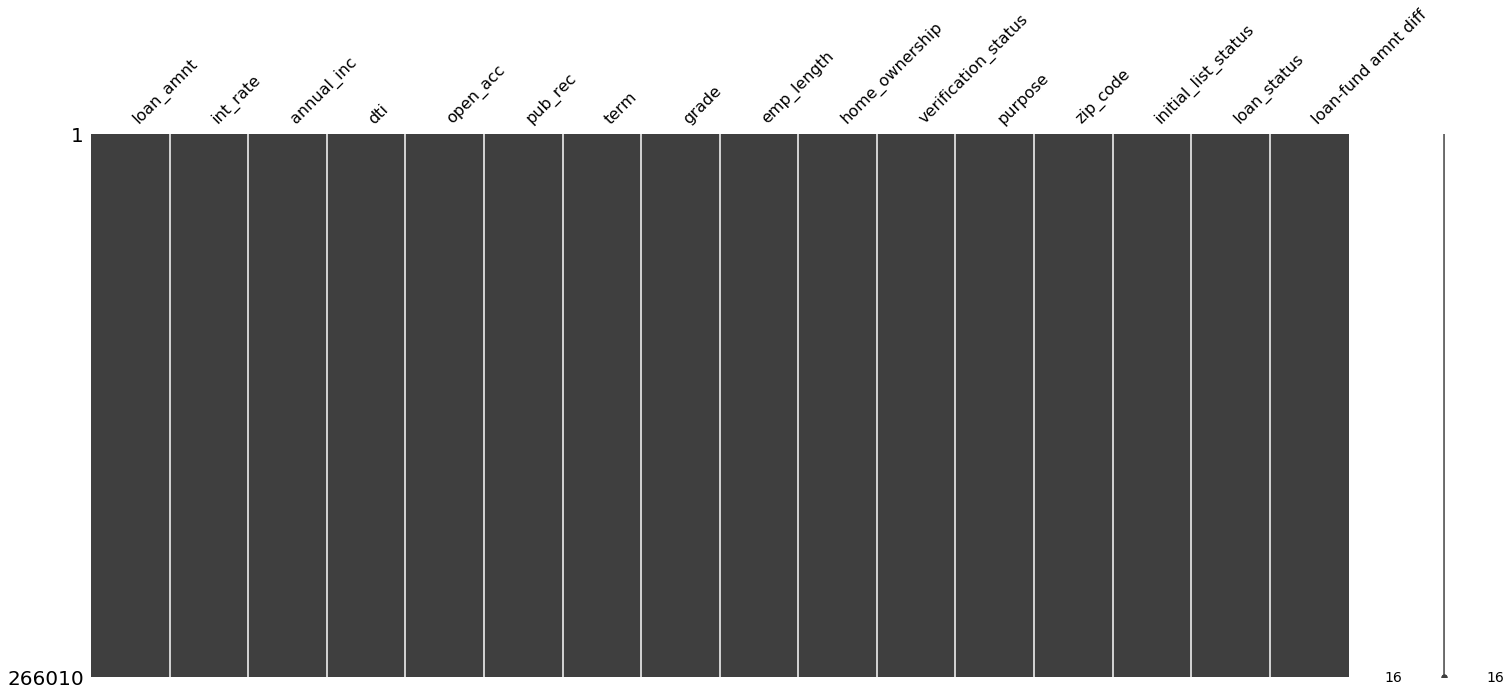

In [14]:
df_cleaned = df1.dropna()
df_cleaned = df_cleaned[df_cleaned.loan_status != 'Current']
df_cleaned = df_cleaned[df_cleaned.loan_status != 'Issued']
# df_cleaned.to_csv("output.csv", index=False)
msno.matrix(df_cleaned)

In [15]:
df_cleaned.columns

Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'pub_rec',
       'term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'purpose', 'zip_code', 'initial_list_status', 'loan_status',
       'loan-fund amnt diff'],
      dtype='object')

In [16]:
df_cleaned.head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,term,grade,emp_length,home_ownership,verification_status,purpose,zip_code,initial_list_status,loan_status,loan-fund amnt diff
0,5000.0,10.65,24000.0,27.65,3.0,0.0,36 months,B,10+ years,RENT,Verified,credit_card,Arizonna,f,Fully Paid,0.0
1,2500.0,15.27,30000.0,1.00,3.0,0.0,60 months,C,< 1 year,RENT,Source Verified,car,Georgia,f,Charged Off,0.0
2,2400.0,15.96,12252.0,8.72,2.0,0.0,36 months,C,10+ years,RENT,Not Verified,small_business,Illinois,f,Fully Paid,0.0
3,10000.0,13.49,49200.0,20.00,10.0,0.0,36 months,C,10+ years,RENT,Source Verified,other,California,f,Fully Paid,0.0
5,5000.0,7.90,36000.0,11.20,9.0,0.0,36 months,A,3 years,RENT,Source Verified,wedding,Arizonna,f,Fully Paid,0.0


In [17]:
df_cleaned.shape

(266010, 16)

## Neural Network

In [18]:
scaler = MinMaxScaler()
scaler1 = StandardScaler()
ohe    = OneHotEncoder(sparse=False)

categorical:

   -term (2)
   -grade (7)
   -emp_length (11)
   -home_ownership (6)
   -verification_status (3)
   -purpose (14)
   -zip_code (52)
   -initial_list_status (2)
   -loan_status (8)

In [57]:
# model with standardized OHE features

columns_to_encode = ['term','grade','emp_length','home_ownership','verification_status','purpose',
 'zip_code','initial_list_status','loan_status']

columns_to_scale  = ['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec','loan-fund amnt diff']


df_with_dummies = pd.get_dummies( df_cleaned, columns = columns_to_encode )

encoded_columns = ['term_ 36 months', 'term_ 60 months', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
                   'grade_G', 'emp_length_1 year', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years',
                   'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years',
                   'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year', 'home_ownership_ANY',
                   'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN',
                   'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified',
                   'verification_status_Verified', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 
                   'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 
                   'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 
                   'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'zip_code_Alabama', 
                   'zip_code_Alaska', 'zip_code_Arizonna', 'zip_code_Arkansas', 'zip_code_California', 
                   'zip_code_Colorado', 'zip_code_Connecticut', 'zip_code_Dakota', 'zip_code_Delaware', 
                   'zip_code_Florida', 'zip_code_Georgia', 'zip_code_Hawaii', 'zip_code_Idaho', 'zip_code_Illinois',
                   'zip_code_Indiana', 'zip_code_Iowa', 'zip_code_Kansas', 'zip_code_Kentucky', 'zip_code_Lousiana', 
                   'zip_code_Maine', 'zip_code_Maryland', 'zip_code_Massachusetts', 'zip_code_Michigan', 
                   'zip_code_Minnesota', 'zip_code_Mississippi', 'zip_code_Missouri', 'zip_code_Montanna', 
                   'zip_code_Nebraska', 'zip_code_Nevada', 'zip_code_New Hampshire', 'zip_code_New Jersey', 
                   'zip_code_New Mexico', 'zip_code_New York', 'zip_code_North Carolina', 'zip_code_Ohio', 
                   'zip_code_Oklahoma', 'zip_code_Oregon', 'zip_code_Pennsylvania', 'zip_code_Puerto Rico', 
                   'zip_code_Rhode Island', 'zip_code_South Carolina', 'zip_code_Tennessee', 'zip_code_Texas', 
                   'zip_code_US Armed Forces', 'zip_code_Utah', 'zip_code_Vermont', 'zip_code_Virginia', 
                   'zip_code_Washington', 'zip_code_Washington, DC', 'zip_code_West Virginia', 'zip_code_Wisconsin',
                   'zip_code_Wyoming', 'initial_list_status_f', 'initial_list_status_w', 'loan_status_Charged Off',
                   'loan_status_Default', 'loan_status_Does not meet the credit policy. Status:Charged Off',
                   'loan_status_Does not meet the credit policy. Status:Fully Paid', 'loan_status_Fully Paid',
                   'loan_status_In Grace Period', 'loan_status_Late (16-30 days)', 'loan_status_Late (31-120 days)']

df_with_dummies_cleaning = df_with_dummies.drop(columns=columns_to_scale)
# df_with_dummies_cleaning[encoded_columns] = scaler1.fit_transform(df_with_dummies[encoded_columns])
df_with_dummies = df_with_dummies.drop(columns=encoded_columns)

df_with_dummies[columns_to_scale] = scaler.fit_transform(df_with_dummies[columns_to_scale])

df_merge_col = pd.merge(df_with_dummies, df_with_dummies_cleaning, left_index=True,right_index=True)


In [58]:
df_merge_col .head()

,loan_amnt,int_rate,annual_inc,dti,open_acc,pub_rec,loan-fund amnt diff,term_ 36 months,term_ 60 months,grade_A,...,initial_list_status_f,initial_list_status_w,loan_status_Charged Off,loan_status_Default,loan_status_Does not meet the credit policy. Status:Charged Off,loan_status_Does not meet the credit policy. Status:Fully Paid,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days)
0,0.130435,0.225180,0.002484,0.466588,0.039474,0.0,0.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0.057971,0.420363,0.003158,0.016875,0.039474,0.0,0.0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
2,0.055072,0.449514,0.001164,0.147148,0.026316,0.0,0.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0.275362,0.345163,0.005316,0.337496,0.131579,0.0,0.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
5,0.130435,0.108999,0.003833,0.188998,0.118421,0.0,0.0,1,0,1,...,1,0,0,0,0,0,1,0,0,0


In [59]:
# model without standardizing OHE features
# columns_to_encode = ['term','grade','emp_length','home_ownership','verification_status','purpose',
#  'zip_code','initial_list_status','loan_status']

# columns_to_scale  = ['loan_amnt','int_rate','annual_inc','dti','open_acc','pub_rec','loan-fund amnt diff']


# df_with_dummies = pd.get_dummies( df_cleaned, columns = columns_to_encode )


# df_with_dummies[columns_to_scale] = scaler.fit_transform(df_with_dummies[columns_to_scale])

# df_merge_col = df_with_dummies

In [60]:
df_merge_col.columns = df_merge_col.columns.str.replace(' ', '_')
df_merge_col.columns = df_merge_col.columns.str.replace('+', 'plus')
df_merge_col.columns = df_merge_col.columns.str.replace('<', 'less_than')
df_merge_col.columns = df_merge_col.columns.str.replace('__', '_')
df_merge_col.columns = df_merge_col.columns.str.replace(',', '.')


In [61]:
y_df = df_merge_col[['loan_status_Charged_Off','loan_status_Default',
                                  'loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off',
                                  'loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid',
                                  'loan_status_Fully_Paid','loan_status_In_Grace_Period','loan_status_Late_(16-30_days)',
                                  'loan_status_Late_(31-120_days)']]

x_df = df_merge_col.drop(columns=['loan_status_Charged_Off','loan_status_Default',
                                  'loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off',
                                  'loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid',
                                  'loan_status_Fully_Paid','loan_status_In_Grace_Period','loan_status_Late_(16-30_days)',
                                  'loan_status_Late_(31-120_days)'])

x_train, x_test, y_train, y_test = train_test_split(
    x_df, y_df, test_size=0.2)

In [72]:
y_train_set = y_train.values
x_train_set = x_train.values

y_test_set = y_test.values
x_test_set = x_test.values

In [88]:
y_test.head()

,loan_status_Charged_Off,loan_status_Default,loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off,loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Late_(16-30_days),loan_status_Late_(31-120_days)
21320,1,0,0,0,0,0,0,0
110887,1,0,0,0,0,0,0,0
407374,0,1,0,0,0,0,0,0
225464,0,0,0,0,1,0,0,0
89146,0,0,0,0,1,0,0,0


In [63]:
x_train_set.shape

(212808, 104)

In [64]:
y_train_set.shape

(212808, 8)

In [74]:
print(x_train_set)
print(x_test_set)

[[0.07246377 0.28728348 0.00299657 ... 0.         1.         0.        ]
 [0.28405797 0.23954373 0.0038327  ... 0.         1.         0.        ]
 [0.85507246 0.56273764 0.00877754 ... 0.         1.         0.        ]
 ...
 [0.13043478 0.3113646  0.00495653 ... 0.         0.         1.        ]
 [0.33333333 0.42036333 0.01124996 ... 0.         1.         0.        ]
 [0.05797101 0.29446557 0.00529368 ... 0.         1.         0.        ]]
[[0.10724638 0.4330376  0.00413209 ... 0.         1.         0.        ]
 [0.83115942 0.5999155  0.0070918  ... 0.         1.         0.        ]
 [0.71014493 0.32403887 0.01327285 ... 0.         0.         1.        ]
 ...
 [0.3115942  0.10899873 0.00416985 ... 0.         1.         0.        ]
 [0.56521739 0.38065061 0.00945184 ... 0.         1.         0.        ]
 [0.56521739 0.44275454 0.00664227 ... 0.         0.         1.        ]]


In [78]:
model = Models.Sequential()

model.add(Layers.Dense(64,activation='relu',input_shape=(104,)))

model.add(Layers.Dense(32,activation='relu'))
model.add(Layers.Dropout(rate=0.15))
model.add(Layers.BatchNormalization())
model.add(Layers.Dense(16,activation='relu'))


model.add(Layers.Dense(8,activation='softmax'))

model.compile(optimizer=Optimizer.Adagrad(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
# model.compile(optimizer=Optimizer.RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 64)                6720      
_________________________________________________________________
dense_55 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 32)                128       
_________________________________________________________________
dense_56 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_57 (Dense)             (None, 8)                 136       
Total params: 9,592
Trainable params: 9,528
Non-trainable params: 64
_________________________________________________________________


In [79]:
trained = model.fit(x_train_set,y_train_set,batch_size=20,epochs=5,validation_split=0.25,shuffle=True)

Train on 159606 samples, validate on 53202 samples
Epoch 1/5
159606/159606 [==============================] - 22s 138us/sample - loss: 0.8154 - acc: 0.7521 - val_loss: 0.7869 - val_acc: 0.7522
Epoch 2/5
159606/159606 [==============================] - 22s 137us/sample - loss: 0.7916 - acc: 0.7536 - val_loss: 0.7805 - val_acc: 0.7523
Epoch 3/5
159606/159606 [==============================] - 22s 135us/sample - loss: 0.7859 - acc: 0.7535 - val_loss: 0.7769 - val_acc: 0.7524
Epoch 4/5
159606/159606 [==============================] - 22s 136us/sample - loss: 0.7826 - acc: 0.7536 - val_loss: 0.7749 - val_acc: 0.7525
Epoch 5/5
159606/159606 [==============================] - 22s 137us/sample - loss: 0.7799 - acc: 0.7536 - val_loss: 0.7732 - val_acc: 0.7523


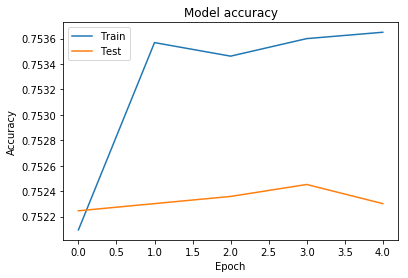

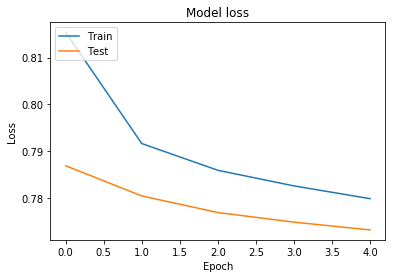

In [80]:
plt.plot(trained.history['acc'])
plt.plot(trained.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(trained.history['loss'])
plt.plot(trained.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [122]:
test_y_predictions = model.predict(x_test_set)

In [123]:
y_predictions_df = pd.DataFrame(data=test_y_predictions,columns=['loan_status_Charged_Off', 'loan_status_Default', 
                                                                 'loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off',
                                                                'loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid',
                                                                'loan_status_Fully_Paid',
                                                                'loan_status_In_Grace_Period',
                                                                'loan_status_Late_(16-30_days)',
                                                                'loan_status_Late_(31-120_days)'])
# y_predictions_df.head()

y_predictions_df = y_predictions_df.astype('float64')
y_predictions_df['Prediction'] = y_predictions_df.idxmax(axis=1)  
y_predictions_df.head(100)

,loan_status_Charged_Off,loan_status_Default,loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off,loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Late_(16-30_days),loan_status_Late_(31-120_days),Prediction
0,0.279305,0.006891,0.001924,0.004071,0.612472,0.030272,0.010136,0.054929,loan_status_Fully_Paid
1,0.233247,0.004057,0.000424,0.001018,0.691450,0.020831,0.006603,0.042371,loan_status_Fully_Paid
2,0.219163,0.004496,0.000152,0.000456,0.621413,0.041164,0.013482,0.099676,loan_status_Fully_Paid
3,0.224719,0.003842,0.003452,0.015193,0.705580,0.017288,0.004938,0.024987,loan_status_Fully_Paid
4,0.140657,0.005285,0.000251,0.000880,0.739913,0.033638,0.015170,0.064205,loan_status_Fully_Paid
5,0.121164,0.003929,0.000331,0.001210,0.798536,0.023629,0.013007,0.038195,loan_status_Fully_Paid
6,0.169328,0.001024,0.054639,0.231080,0.513918,0.009764,0.001247,0.018999,loan_status_Fully_Paid
7,0.045196,0.000926,0.000075,0.000231,0.913570,0.016496,0.005933,0.017572,loan_status_Fully_Paid
8,0.113648,0.001885,0.001290,0.004413,0.829280,0.019520,0.005271,0.024692,loan_status_Fully_Paid
9,0.102254,0.002238,0.000275,0.001189,0.809644,0.032210,0.010372,0.041819,loan_status_Fully_Paid


In [127]:
y_real_df = pd.DataFrame(data=y_test_set,columns=['loan_status_Charged_Off', 'loan_status_Default', 
                                                                 'loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off',
                                                                'loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid',
                                                                'loan_status_Fully_Paid',
                                                                'loan_status_In_Grace_Period',
                                                                'loan_status_Late_(16-30_days)',
                                                                'loan_status_Late_(31-120_days)'])
y_real_df = y_real_df.astype('float64')
y_real_df['Real'] = y_real_df.idxmax(axis=1) 
y_real_df.head(100)

,loan_status_Charged_Off,loan_status_Default,loan_status_Does_not_meet_the_credit_policy._Status:Charged_Off,loan_status_Does_not_meet_the_credit_policy._Status:Fully_Paid,loan_status_Fully_Paid,loan_status_In_Grace_Period,loan_status_Late_(16-30_days),loan_status_Late_(31-120_days),Real
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_status_Charged_Off
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_status_Charged_Off
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_status_Default
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,loan_status_Fully_Paid
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,loan_status_Fully_Paid
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,loan_status_Fully_Paid
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,loan_status_Fully_Paid
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,loan_status_Fully_Paid
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,loan_status_Charged_Off
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,loan_status_Fully_Paid


In [130]:
len(y_predictions_df['Prediction'].unique())

4

In [131]:
len(y_real_df['Real'].unique())

8

In [134]:
model.evaluate(x_test_set,y_test_set,verbose=1)

53202/53202 [==============================] - 2s 29us/sample - loss: 0.7732 - acc: 0.7534


[0.7732417288254421, 0.7534303]